In [1]:
import numpy as np
import os
import pandas as pd

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential


from tqdm import tqdm
import cv2

In [2]:
# 1. Augmentation
    # 1. Dynamic
    # 2. Static
# 2. Segmentation
# 3. Anotation

In [3]:
# # Overfitting
#     1.  EarlyStoping
#     2. Dropout
#     3. Regularization

In [4]:
classNames = ["cats", 'dogs']
classNameslabels = {classnames: i for i, classnames in enumerate(classNames)}
##enumerate counting the iteration and indexing the value in the list starts with 0

In [5]:
print(classNameslabels)

{'cats': 0, 'dogs': 1}


In [6]:
print(len(classNameslabels))

2


#### Home Work_1: Split the file name and extrat the class names 

In [7]:
file_name ="../input/cat-and-dogs/dataset/training_set/dogs/dog.20.jpg"
print("Only the file name:",'\n', file_name.split('/')[4])
print("Only the class of image:", '\n', file_name.split('/')[4].split('.')[0])

Only the file name: 
 training_set
Only the class of image: 
 training_set


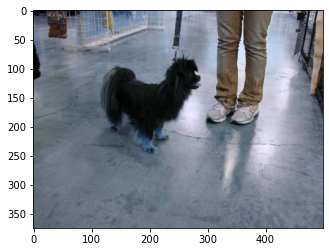

In [8]:
 
imageData = cv2.imread("dataset/training_set/dogs/dog.1000.jpg")
plt.imshow(imageData)
plt.show()

In [9]:
print(imageData.shape)

(375, 499, 3)


In [10]:
image_shape = (128, 128)

In [11]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    dataset_path = ["dataset/training_set/", "dataset/test_set/"]
    #Store data into the list with their paths
    imageataOutput = []
    # Tag each data path file
    for i in dataset_path:
        #List for image ata
        images = []
        #list for class names
        labels = []
        print("Counting : {}".format(i))

            
        for j in os.listdir(i):
            label = classNameslabels[j]
            for imagedatafile in tqdm(os.listdir(os.path.join(i, j))):
                
                imagePath = os.path.join(os.path.join(i, j), imagedatafile)
                
                #image Read & Preprocessing
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_shape)
                
                #print("Images: ", image)
                
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = "float32")
        labels = np.array(labels, dtype = 'float32')
        #print(images)
        imageataOutput.append((images, labels))
    
    return imageataOutput

In [12]:
#datasetLoaderFromDirectory()

In [13]:
#to shuffle the whole Dataset
#(train_image, train_labesl), (test_image, test_labels) = shuffle(datasetLoaderFromDirectory())

In [14]:
#to unpack the whole Dataset and store it to 4 different variables without shuffle
(train_images, train_labels), (test_images, test_labels) = datasetLoaderFromDirectory()

Counting : dataset/training_set/


100%|██████████| 4000/4000 [00:06<00:00, 658.38it/s]


Counting : dataset/test_set/


100%|██████████| 1000/1000 [00:01<00:00, 748.29it/s]


In [15]:
#now we will shuffle on train dataset only and magic key word (random_state)
train_images, train_labels = shuffle(train_images, train_labels, random_state = 42)

In [16]:
train_labels[5]

0.0

#### Cheking the image shape and labels of train and test

In [17]:
#print("Train image shape: ", train_image.shape)
#print("Train image labels shape: ", train_labels.shape)
#print("Test image shape: ", test_image.shape)
#print("Test image labels shape: ", test_labels.shape)

In [18]:
print("train_labels output:", train_labels)
print("test_labels output:", test_labels)

train_labels output: [0. 0. 0. ... 0. 1. 1.]
test_labels output: [0. 0. 0. ... 1. 1. 1.]


In [19]:
#unpack train dataset: total no of label == total no of quantity
#_,: value referencing. There are two variables. But we need to unpack only one variable
_, trainImageLabelInfo = np.unique(train_labels, return_counts=True)
_, testImageLabelInfo = np.unique(test_labels, return_counts = True)

In [20]:
print("Train Image Label information for 0 Class: ", trainImageLabelInfo[0])
print("Train Image Label information for 1 Class: ", trainImageLabelInfo[1])

print("---------------------------------------------------")

print("Test Image Label information for 0 Class: ", testImageLabelInfo[0])
print("Test Image Label information for 1 Class: ", testImageLabelInfo[1])

Train Image Label information for 0 Class:  4000
Train Image Label information for 1 Class:  4000
---------------------------------------------------
Test Image Label information for 0 Class:  1000
Test Image Label information for 1 Class:  1000


#### Visualization train and test data set

In [21]:
#Creating DataFrame for storing IMAGE labels metadata
#uing Dictonary Concept, we need to use {} and it should be classNames for Index

pd.DataFrame({"Train": trainImageLabelInfo,
              "Test": testImageLabelInfo},
               index = classNames)

Train  Test
cats   4000  1000
dogs   4000  1000

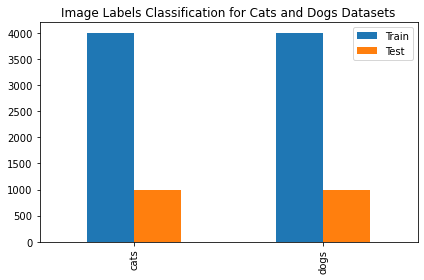

In [22]:

pd.DataFrame({"Train":trainImageLabelInfo,
            "Test": testImageLabelInfo}, 
             index = classNames
            ).plot.bar()
# plt.plot()
# plt.bar()
plt.title("Image Labels Classification for Cats and Dogs Datasets")
plt.grid(False)
plt.tight_layout()
plt.show()

#### Home Work_2: Create a Pie chart using above concept

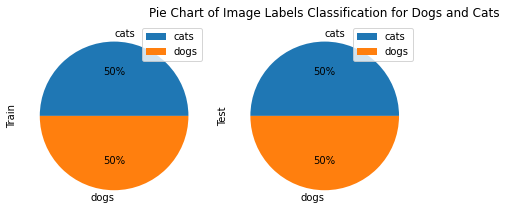

In [23]:
pd.DataFrame({"Train": trainImageLabelInfo,
              "Test": testImageLabelInfo},
               index = classNames).plot.pie(subplots=True,  autopct='%1.0f%%')
plt.title("Pie Chart of Image Labels Classification for Dogs and Cats")
plt.tight_layout()
plt.show()

In [24]:
# Read one image features
imageFeature = train_images[0] # Image feature value should be in range between [0, 255]
#np.unique(imageFeature)
len(np.unique(imageFeature))
# print("Array Details of imageFeature:", "\n", imageFeature)

235

In [25]:
# Scaleing image featues 
train_images = train_images/255.0
test_images = test_images/255.0

In [26]:
#train_images[0]
#np.unique(train_images[0]) # "Values are in between 0 and 1"
len(np.unique(train_images[0]))

235

In [27]:
#train_images.shape[0]
#np.random.randint(train_images.shape[0])
train_images.shape # (8000, 128, 128, 3) --> (Number of Image, Image_W, Image_H, Number of Color channle)

(8000, 128, 128, 3)

In [28]:
#train_labels[345]

In [29]:
# Random Index Generation of train_images
# print(np.random.randint(train_images.shape[0]))
# print(np.random.randint(train_images.shape[0]))
# print(np.random.randint(train_images.shape[0]))
# print(np.random.randint(train_images.shape[0]))

In [30]:
#Now read an image after Scalling
def ImageVisualization(classNames, imagePath, imagelabel):
    #create index for indivisual Image and index will be genarated in random order
    #we will identify image using feature metrics
    index= np.random.randint(imagePath.shape[0]) #index is always integers and choose index randomly
    #print(index) #---- to check index float/int(it's int)
    plt.figure() #define frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([]) #X-label positioning
    plt.yticks([])  #Y-label poitioning
    plt.grid(False)
    plt.tight_layout()
    #{} use to pass the index values and + use to concat the label of actual image
    plt.title("Index of this Image is: {}".format(index) + "And Class is: " + classNames[int(imagelabel[index])]) #train_images is float
    plt.show()

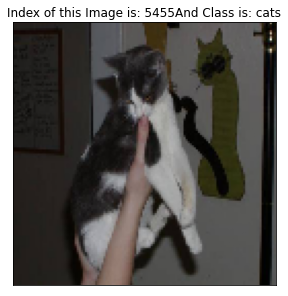

In [31]:
ImageVisualization(classNames, train_images, train_labels)

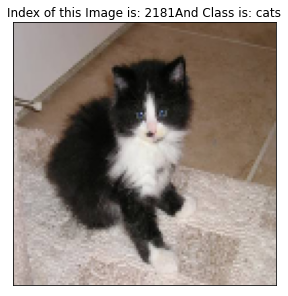

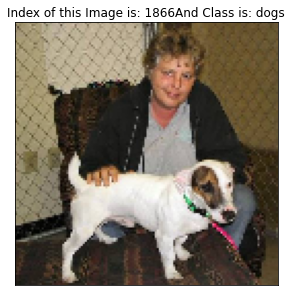

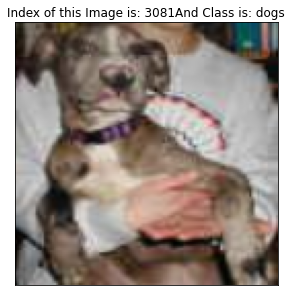

In [32]:
for i in range(1, 4):
    ImageVisualization(classNames, train_images, train_labels)

#### Home work_3: Create function to plot both predicted Class and Actual Class

In [33]:
#Now read an image after Scalling
def ImageVisualization01(classNames, imagePath, imagelabel, actual_label):
    #create index for indivisual Image and index will be genarated in random order
    #we will identify image using feature metrics
    index= np.random.randint(imagePath.shape[0]) #index is always integers and choose index randomly
    #print(index) #---- to check index float/int(it's int)
    plt.figure() #define frame size
    plt.imshow(imagePath[index])
    
    plt.xticks([]) #X-label positioning
    plt.yticks([])  #Y-label poitioning
    plt.grid(False)
    plt.tight_layout()
    #{} use to pass the index values and + use to concat the label of actual image
    plt.title("Index of this Image is: {}".format(index) + " And Predicted Class is: " 
              + classNames[int(imagelabel[index])]
              + ". Actual  is: " + classNames[int(actual_label[index])]) #train_images is float
    plt.show()

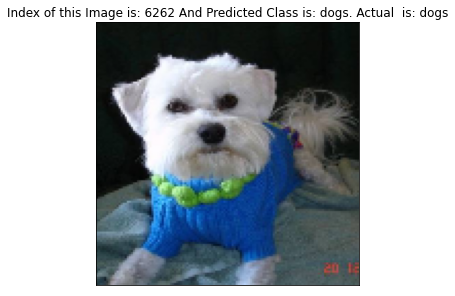

In [34]:
ImageVisualization01(classNames, train_images, train_labels, train_labels)

In [35]:
# Home Work: Visualize Image at shape of (3, 3)
# Now Read an image after Scalling
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

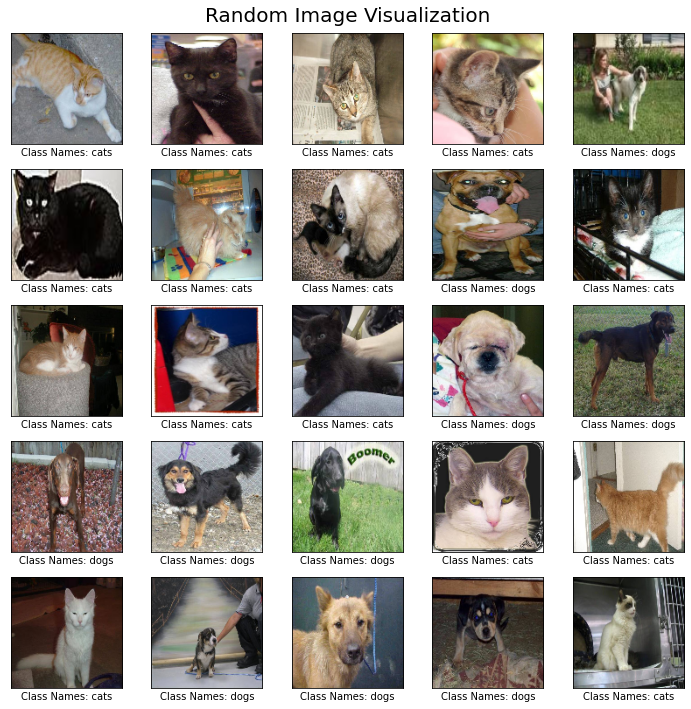

In [36]:
ImageVisualization2(classNames, train_images, train_labels)

#### Home Work_4:Visualize Image at shape of (3, 3)

In [37]:
def ImageVisualization2(classNames, imagePath, imagelabel):
    
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle("Random Image Visualization", fontsize = 20 )
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.tight_layout()
        
        plt.imshow(imagePath[i], cmap = plt.cm.binary)
        plt.xlabel("Class Names: {}".format(classNames[int(imagelabel[i])]))
    plt.show()

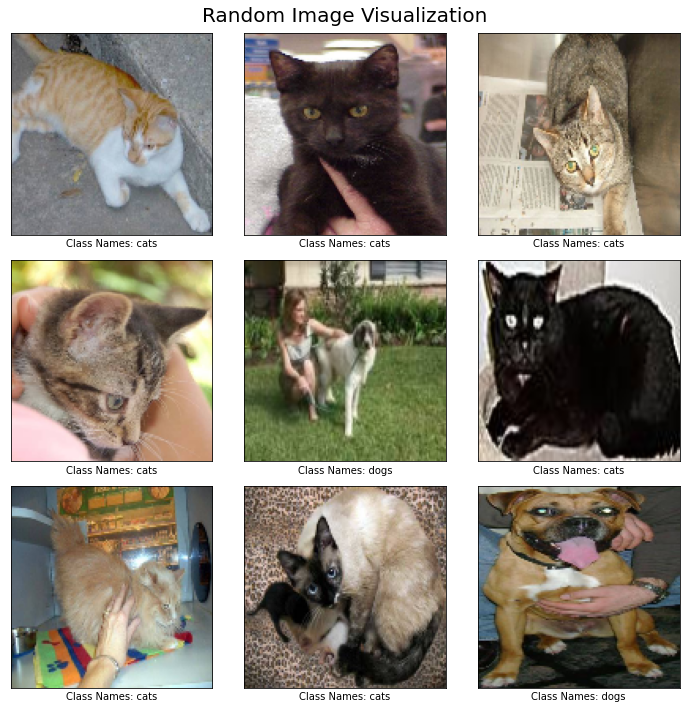

In [38]:
ImageVisualization2(classNames, train_images, train_labels)

In [39]:
train_images.shape

(8000, 128, 128, 3)

In [40]:
# train_images[0]

#### Building CNN model for the supevised image Dataset

In [41]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    MaxPooling2D(2, 2),
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [43]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy", # for softmax is better and for sigmoid, binary_crossentropy/categorial_crossentropy
             metrics = ['accuracy'])

In [44]:
modelData = model.fit(train_images,
                     train_labels,
                      epochs = 10,
                     batch_size = 128,
                     validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 31s 605ms/step - loss: 0.7001 - accuracy: 0.5173 - val_loss: 0.6742 - val_accuracy: 0.5838
Epoch 2/10
50/50 [==============================] - 30s 607ms/step - loss: 0.6753 - accuracy: 0.5800 - val_loss: 0.6271 - val_accuracy: 0.6381
Epoch 3/10
50/50 [==============================] - 30s 600ms/step - loss: 0.6361 - accuracy: 0.6402 - val_loss: 0.6546 - val_accuracy: 0.6156
Epoch 4/10
50/50 [==============================] - 30s 596ms/step - loss: 0.6089 - accuracy: 0.6639 - val_loss: 0.5707 - val_accuracy: 0.7119
Epoch 5/10
50/50 [==============================] - 36s 715ms/step - loss: 0.5544 - accuracy: 0.7184 - val_loss: 0.5279 - val_accuracy: 0.7444
Epoch 6/10
50/50 [==============================] - 36s 718ms/step - loss: 0.5220 - accuracy: 0.7400 - val_loss: 0.5227 - val_accuracy: 0.7444
Epoch 7/10
50/50 [==============================] - 36s 714ms/step - loss: 0.4894 - accuracy: 0.7634 - val_loss: 0.4636 - val_accuracy: 0.7875

In [45]:
def accuracy_and_loss_Plot(modelData):
    
    fig = plt.figure(figsize = (10, 10))
    
    plt.subplot(221)
    plt.plot(modelData.history["accuracy"], 'bo--', label = 'accuracy')
    plt.plot(modelData.history["val_accuracy"], 'ro--', label = 'val_accuracy')
    plt.title("Training Data Accuracy Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    
    plt.subplot(222)
    plt.plot(modelData.history["loss"], 'bo--', label = 'loss')
    plt.plot(modelData.history["val_loss"], 'ro--', label = 'val_loss')
    plt.title("Training Data Loss Measurement")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss Information")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.show()

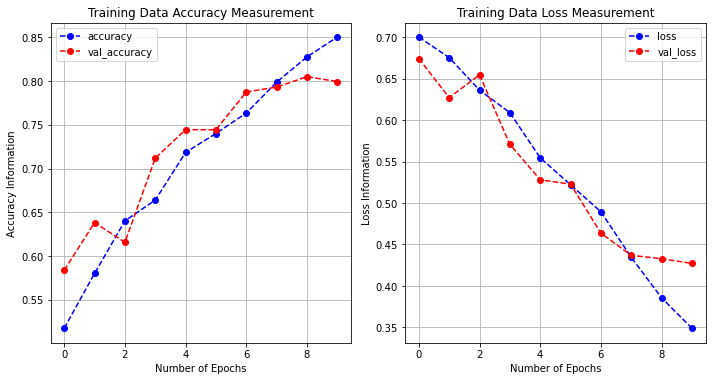

In [46]:
accuracy_and_loss_Plot(modelData)

In [48]:
testLoss = model.evaluate(test_images, test_labels)

63/63 [==============================] - 3s 54ms/step - loss: 0.4368 - accuracy: 0.8030


63/63 [==============================] - 3s 47ms/step


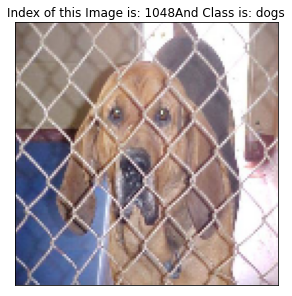

In [49]:
predictedData = model.predict(test_images)
predictedDataLabels = np.argmax(predictedData, axis = 1)
ImageVisualization(classNames, test_images, predictedDataLabels)

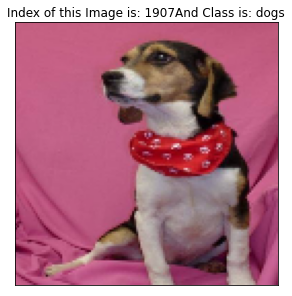

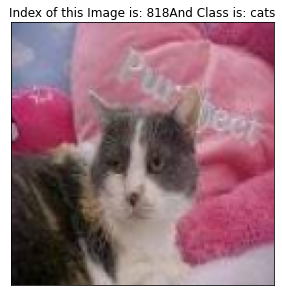

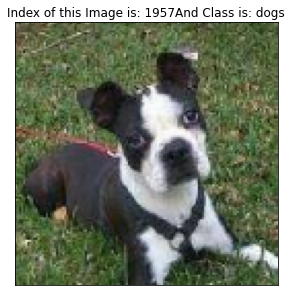

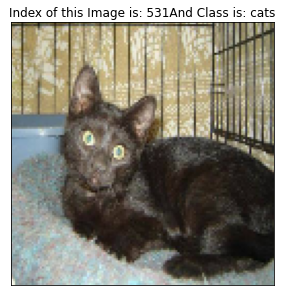

In [50]:
for i in range(1, 5):
    ImageVisualization(classNames, test_images, predictedDataLabels)

#### Home Work_5: Compare Pridected and Actual Class Name 

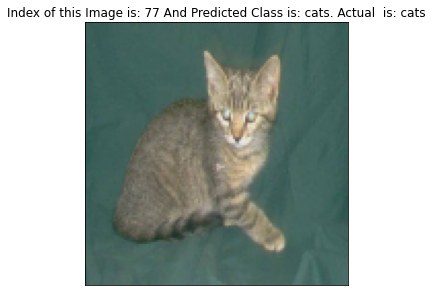

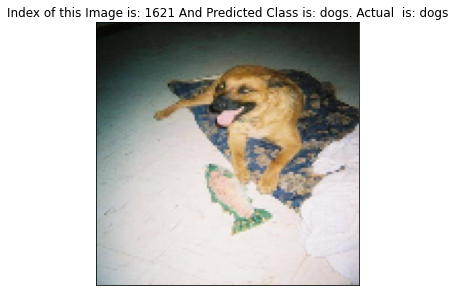

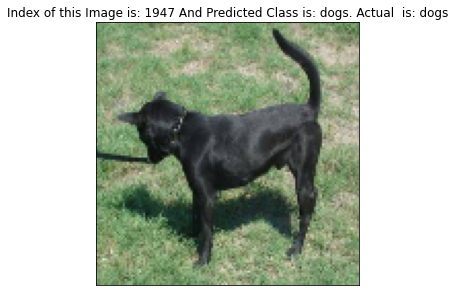

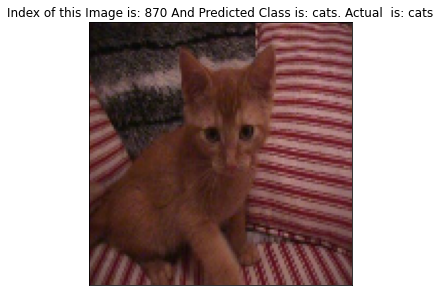

In [51]:
#Predicted vs Test Class
for i in range(1,5):
    ImageVisualization01(classNames, test_images, predictedDataLabels, test_labels)

In [52]:
# def missClassification(classNames, ImageData, ImageLabels, predictedDataLabels):
    
#     result = (ImageLabels == predictedDataLabels)
#     #print(result)
#     missClass = np.where(result == 0)
#     #print(int(missClass))
    
#     missClassImage = imageData[missClass]
#     missClasslabels = predictedDataLabels[missClass]
    
#     print("Miss Classification Image Data is: ")
#     ImageVisualization2(classNames, missClassImage, missClasslabels)

#### Home work_6: Solve the variable issue

In [53]:
def missClassification(class_names, test_images, test_labels, pred_labels):
    result = (test_labels == pred_labels)
    missClass = np.where(result == 0)
    missClassImage = test_images[missClass]
    missClasslabels = pred_labels[missClass]

    title = "Some examples of mislabeled images by the classifier:"
    ImageVisualization2(class_names,  missClassImage, missClasslabels)

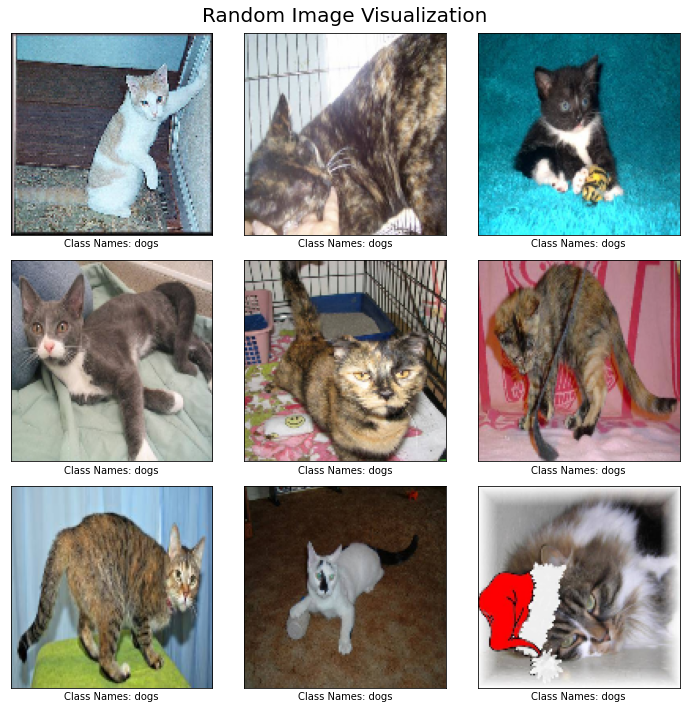

In [55]:
missClassification(classNames, test_images, test_labels, predictedDataLabels)

#### Home work_7: Find the accuracy, miss classification, precision and recall

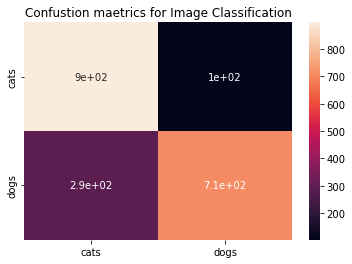

In [56]:
Cm = confusion_matrix(test_labels, predictedDataLabels)
ax = plt.axes()
sns.heatmap(Cm, annot=True, 
           annot_kws={'size':10}, 
           xticklabels=classNames,
           yticklabels=classNames, 
           ax = ax)

plt.title("Confustion maetrics for Image Classification")
plt.show()

In [57]:
TP = 900
TN =710
FP =290
FN =100


accuracy = (TP + TN) / (TP + TN + FP + FN)
missClassification  = (FP + FN) / (TP + TN + FP + FN)
precision = TP/(TP + FP)
recall = TP/(TP + FN)

In [58]:
print("Accuracy = ",accuracy)
print("Miss Classification = ",missClassification)
print("Precision = ",precision)
print("Recall = ",recall)

Accuracy =  0.805
Miss Classification =  0.195
Precision =  0.7563025210084033
Recall =  0.9
